In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn-bright')

import pickle
from IPython.display import display
%load_ext memory_profiler
%load_ext line_profiler

In [156]:
# not in notes (!)
df = pd.DataFrame(np.ones(50).reshape(10,5), 
                      index=pd.date_range('1/1/2016', periods=10, freq='H' ),
                      columns=list('ABCDE'))
df['size']=0
df['size'] = pd.Series([0,0,0,0,200,0,0,2000,0,0], index=df.index)
df.loc[:,"size_csum"] = df['size'].cumsum()

start = pd.to_datetime('1/1/1900')
df.loc[:,"size_astime"] = start + pd.to_timedelta(df.size_csum,'ms')
df.index = df.size_astime

display(df)
print(df.E.resample('1000ms',label='right').sum())

# timestamp_col = df.timestamp.resample('30min',label='right').last()

# pd.to_datetime(timestamp_col).dropna()

# after going around the circle, the workaround has to be applying an extra operation:
# `pd.to_datetime(timestamp_col).dropna()`

# df

,A,B,C,D,E,size,size_csum,size_astime
size_astime,,,,,,,,
1900-01-01 00:00:00.000,1.0,1.0,1.0,1.0,1.0,0,0,1900-01-01 00:00:00.000
1900-01-01 00:00:00.000,1.0,1.0,1.0,1.0,1.0,0,0,1900-01-01 00:00:00.000
1900-01-01 00:00:00.000,1.0,1.0,1.0,1.0,1.0,0,0,1900-01-01 00:00:00.000
1900-01-01 00:00:00.000,1.0,1.0,1.0,1.0,1.0,0,0,1900-01-01 00:00:00.000
1900-01-01 00:00:00.200,1.0,1.0,1.0,1.0,1.0,200,200,1900-01-01 00:00:00.200
1900-01-01 00:00:00.200,1.0,1.0,1.0,1.0,1.0,0,200,1900-01-01 00:00:00.200
1900-01-01 00:00:00.200,1.0,1.0,1.0,1.0,1.0,0,200,1900-01-01 00:00:00.200
1900-01-01 00:00:02.200,1.0,1.0,1.0,1.0,1.0,2000,2200,1900-01-01 00:00:02.200
1900-01-01 00:00:02.200,1.0,1.0,1.0,1.0,1.0,0,2200,1900-01-01 00:00:02.200


size_astime
1900-01-01 00:00:01    7.0
1900-01-01 00:00:02    NaN
1900-01-01 00:00:03    3.0
Freq: 1000L, Name: E, dtype: float64


In [179]:
# flattening history for autoregression
df = pd.DataFrame({'val': [10,40,30,10,11,12]})
display(df)
for i in range(1,2):
    df['val_t-' + str(i)] = df['val'].shift(i)

for i in range(1,5):
    df['d_val_t+' + str(i)] = df['val'].shift(-i) - df['val']

display(df)
df[['d_val_t+3','d_val_t+4']].mean(axis=1)


,val
0,10
1,40
2,30
3,10
4,11
5,12


,val,val_t-1,d_val_t+1,d_val_t+2,d_val_t+3,d_val_t+4
0,10,NaN,30.0,20.0,0.0,1.0
1,40,10.0,-10.0,-30.0,-29.0,-28.0
2,30,40.0,-20.0,-19.0,-18.0,NaN
3,10,30.0,1.0,2.0,NaN,NaN
4,11,10.0,1.0,NaN,NaN,NaN
5,12,11.0,NaN,NaN,NaN,NaN


0     0.5
1   -28.5
2   -18.0
3     NaN
4     NaN
5     NaN
dtype: float64

<IPython.core.display.Javascript object>


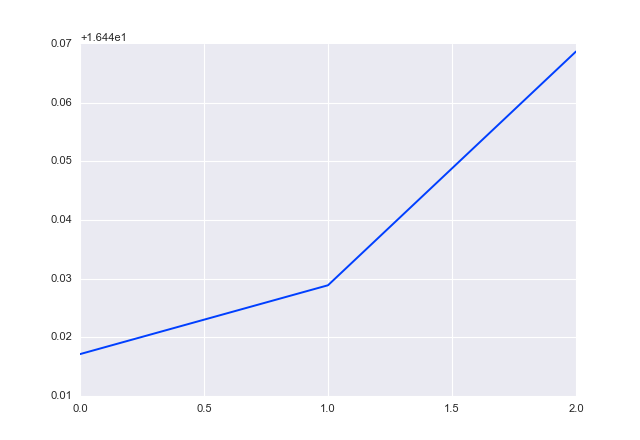

False

In [190]:
X_train = [[1,2,2],[3,4,4]]
y_train = [100,200]

# ElasticNet

enet = ElasticNet(alpha=0.1, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train) # .predict(X_test)
# r2_score_enet = r2_score(y_test, y_pred_enet)
# print(enet)
# print("r^2 on test data : %f" % r2_score_enet)

plt.plot(enet.coef_, label='Elastic net coefficients')
# plt.plot(lasso.coef_, label='Lasso coefficients')
# plt.plot(coef, '--', label='original coefficients')
# plt.legend(loc='best')
# plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
#           % (r2_score_lasso, r2_score_enet))
# plt.show()
 